In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [4]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(df1.drop('Loan_Status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df1.drop('Loan_Status',axis=1))
scaled_features

array([[-1.72923217,  0.47491989, -1.36228263, ...,  0.29977577,
         0.43315227,  1.22329839],
       [-1.7235903 ,  0.47491989,  0.73406207, ...,  0.29977577,
         0.43315227, -1.31851281],
       [-1.71794844,  0.47491989,  0.73406207, ...,  0.29977577,
         0.43315227,  1.22329839],
       ...,
       [ 1.71794844,  0.47491989,  0.73406207, ...,  0.29977577,
         0.43315227,  1.22329839],
       [ 1.7235903 ,  0.47491989,  0.73406207, ...,  0.29977577,
         0.43315227,  1.22329839],
       [ 1.72923217, -2.10561827, -1.36228263, ...,  0.29977577,
        -2.30865695, -0.04760721]])

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.474920,-1.362283,-0.752177,-0.528362,-0.403582,0.898633,-0.852357,-0.133268,0.299776,0.433152,1.223298
1,-1.723590,0.474920,0.734062,0.236767,-0.528362,-0.403582,0.410559,-0.204048,-0.133268,0.299776,0.433152,-1.318513
2,-1.717948,0.474920,0.734062,-0.752177,-0.528362,2.477808,-0.753846,-0.852357,-1.335961,0.299776,0.433152,1.223298
3,-1.712307,0.474920,0.734062,-0.752177,1.892641,-0.403582,-1.095498,0.876466,-0.308205,0.299776,0.433152,1.223298
4,-1.706665,0.474920,-1.362283,-0.752177,-0.528362,-0.403582,0.933495,-0.852357,0.151004,0.299776,0.433152,1.223298
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.105618,-1.362283,-0.752177,-0.528362,-0.403582,-0.851461,-0.852357,-1.270359,0.299776,0.433152,-1.318513
610,1.712307,0.474920,0.734062,2.214653,-0.528362,-0.403582,0.194412,-0.852357,-1.751436,-2.407023,0.433152,-1.318513
611,1.717948,0.474920,0.734062,0.236767,-0.528362,-0.403582,1.282119,-0.819941,1.637969,0.299776,0.433152,1.223298
612,1.723590,0.474920,0.734062,1.225710,-0.528362,-0.403582,1.219367,-0.852357,0.981955,0.299776,0.433152,1.223298


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],test_size=0.20)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
pred = knn.predict(X_test)
pred

array(['N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [15]:
knn.score(X_test,y_test)

0.7398373983739838

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [17]:
print(confusion_matrix(y_test,pred))

[[18 16]
 [16 73]]


In [18]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    accuracy_rate.append(score.mean())

In [19]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

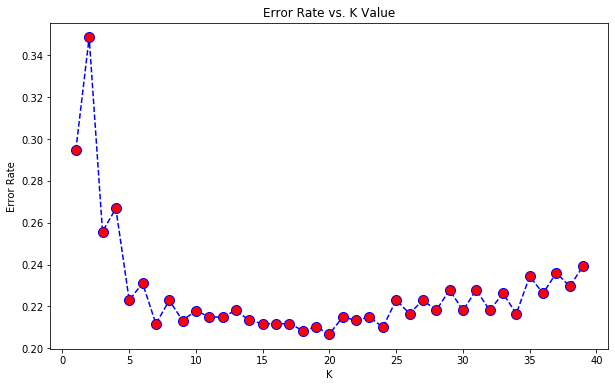

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')

WITH K=1


[[18 16]
 [16 73]]




In [22]:

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')


WITH K=25


[[15 19]
 [ 4 85]]




In [23]:
knn.score(X_test,y_test)

0.8130081300813008